In [1]:
import importlib.util
spec = importlib.util.spec_from_file_location("bltmat", "/Users/claudiopierard/WRF/bltmat.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)

In [2]:
import numpy as np
import scipy as spy
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [3]:
mar_24h = sio.loadmat("/Users/claudiopierard/WRF/Datos/WRF/03_24hrs_D2.mat")
mar_48h = sio.loadmat("/Users/claudiopierard/WRF/Datos/WRF/03_48hrs_D2.mat")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/claudiopierard/WRF/Datos/WRF/03_24hrs_D2.mat'

In [9]:
cca_mar_48.keys()

NameError: name 'cca_mar_48' is not defined

In [9]:
cca_mar_24['PBLH'][1,1, :, 0]

array([    0.        ,   191.29264832,   172.12187195,   135.02987671,
         234.5316925 ,   136.73649597,    79.89274597,    83.5763092 ,
          88.77218628,    60.98763657,    37.74210739,    18.9831543 ,
          18.9543457 ,    56.64791489,    62.96857452,   378.14422607,
         522.51367188,   735.70379639,   838.8057251 ,   950.99572754,
        1329.29077148,  1386.59851074,  1370.18945312,  1382.62585449])

In [10]:
cca_mar_24['PBLH_std'][0, :, 0]

array([   0.        ,   82.26256561,   34.75196075,   75.11644745,
         94.66239166,   50.7889595 ,   68.86230469,   10.73683167,
         30.7016716 ,   37.64409256,   31.68114471,   48.0682869 ,
         41.70087433,   21.41396332,   21.33701324,   40.86206055,
         94.28166962,  102.12630463,  140.57818604,  192.59243774,
        182.27459717,  228.43128967,  251.54605103,  278.73010254], dtype=float32)

In [11]:
x_24 = range(0, 24)
x_48 = range(24, 48)
x_72 = range(48, 72)

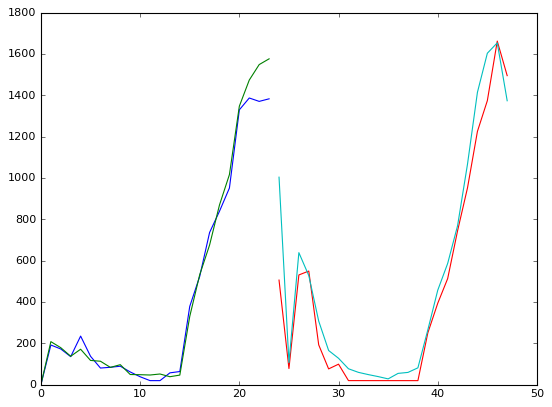

In [12]:
plt.figure(figsize=(8,6))
plt.plot(x_24, cca_mar_24['PBLH'][1,1, :, 0])
plt.plot(x_24, cca_mar_24['PBLH_avg'][0, :, 0])
plt.plot(x_48, cca_mar_48['PBLH'][1,1,:, 0])
plt.plot(x_48, cca_mar_48['PBLH_avg'][0, :, 0])

In [13]:
mar_ceilo_dt, mar_ceilo_raw, mar_ceilo_filtered = blt.read_celiomentro_month("/Users/claudiopierard/WRF/Datos/ceilometro/2015_utc/mar_2015_utc.dat")

In [14]:
jan_ceilo_dt, jan_ceilo_raw, jan_ceilo_filtered = blt.read_celiomentro_month("/Users/claudiopierard/WRF/Datos/ceilometro/2015_utc/jan_2015_utc.dat")

In [15]:
mar_ceilo_dt[0].day

1

In [16]:
import matplotlib.dates as mdates

In [17]:
dates = mdates.drange(mar_ceilo_dt[0], mar_ceilo_dt[-1], 
                      datetime.timedelta(minutes=10))

In [18]:
width = np.diff(dates).min()

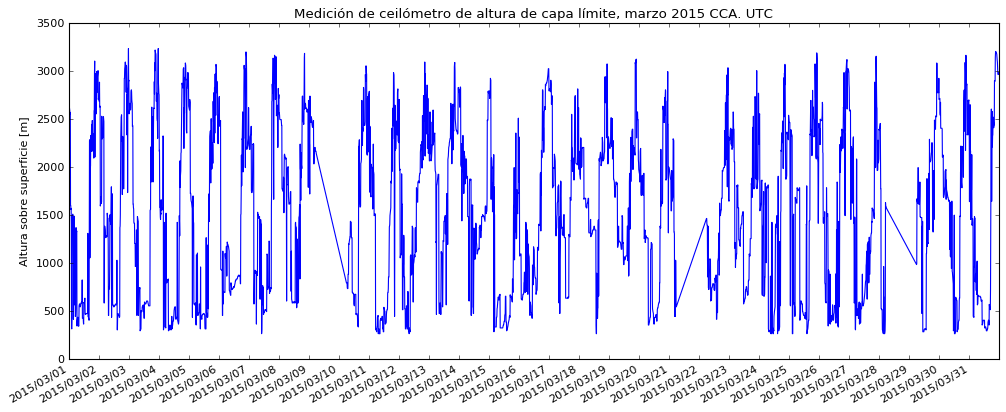

In [19]:

fig = plt.figure(figsize=(15, 6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())    
plt.plot(mar_ceilo_dt, mar_ceilo_raw)
fig.autofmt_xdate()
plt.ylabel("Altura sobre superficie [m]")
plt.title("Medición de ceilómetro de altura de capa límite, marzo 2015 CCA. UTC")

In [20]:
mar_ceilo_dt[143]

datetime.datetime(2015, 3, 1, 23, 50)

In [21]:
dates = mdates.drange(mar_ceilo_dt[0], mar_ceilo_dt[143], datetime.timedelta(hours=1))

In [22]:
dates.shape

(24,)

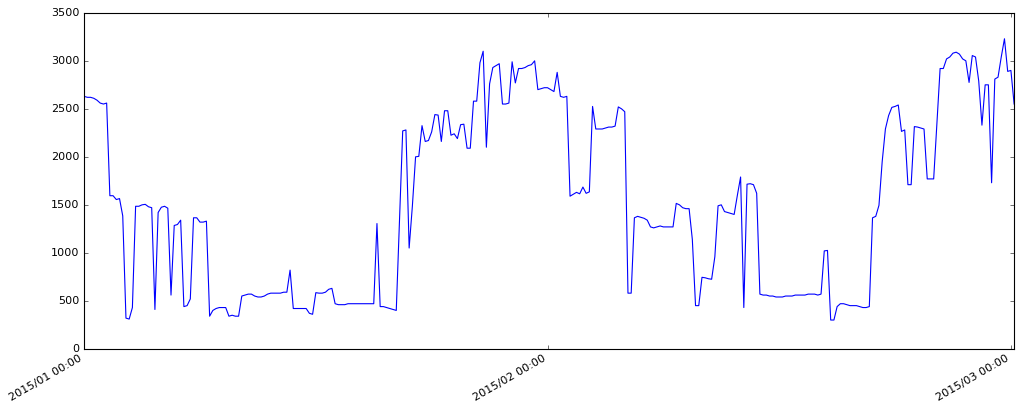

In [23]:
#dates = mdates.drange(datetime.datetime(2015, 1, 3, 0, 0), datetime.datetime(2015, 1, 3, 23, 0), datetime.timedelta(hours=1))
fig = plt.figure(figsize=(15, 6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())    
plt.plot(mar_ceilo_dt[0:290], mar_ceilo_raw[0:290])
#plt.plot(dates, cca_mar_24['PBLH'][1,1, :, 0])
#plt.xaxis_date()
fig.autofmt_xdate()

In [24]:
dates

array([ 735658.        ,  735658.04166667,  735658.08333333,
        735658.125     ,  735658.16666667,  735658.20833333,
        735658.25      ,  735658.29166667,  735658.33333333,
        735658.375     ,  735658.41666667,  735658.45833333,
        735658.5       ,  735658.54166667,  735658.58333333,
        735658.625     ,  735658.66666667,  735658.70833333,
        735658.75      ,  735658.79166667,  735658.83333333,
        735658.875     ,  735658.91666667,  735658.95833333])

In [25]:
mar_ceilo_dt_hourly = []
mar_ceilo_raw_hourly = []

for i in range(0, len(mar_ceilo_dt)):
    if mar_ceilo_dt[i].minute == 0:
        mar_ceilo_dt_hourly.append(mar_ceilo_dt[i])
        mar_ceilo_raw_hourly.append(mar_ceilo_raw[i])

In [26]:
jan_ceilo_dt_hourly = []
jan_ceilo_raw_hourly = []

for i in range(0, len(jan_ceilo_dt)):
    if jan_ceilo_dt[i].minute == 0:
        jan_ceilo_dt_hourly.append(jan_ceilo_dt[i])
        jan_ceilo_raw_hourly.append(jan_ceilo_raw[i])

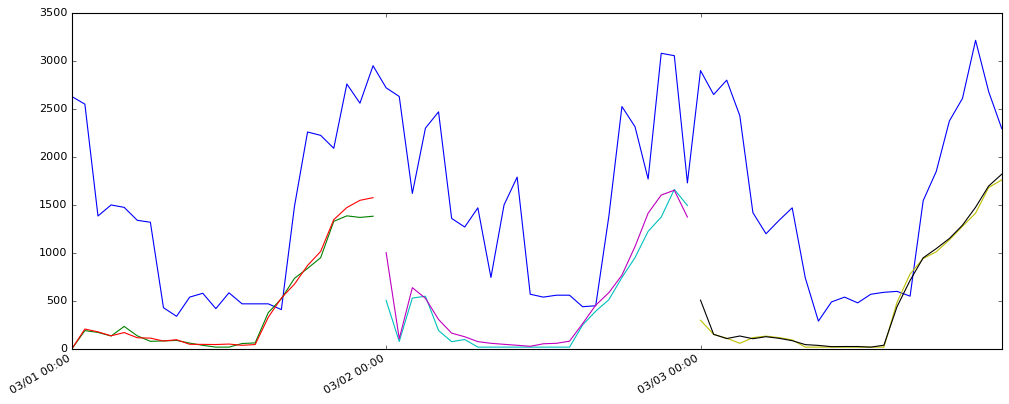

In [27]:
#dates = mdates.drange(datetime.datetime(2015, 1, 3, 0, 0), datetime.datetime(2015, 1, 3, 23, 0), datetime.timedelta(hours=1))
fig = plt.figure(figsize=(15, 6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())    
plt.plot(mar_ceilo_dt_hourly[0:72], mar_ceilo_raw_hourly[0:72])
plt.plot(mar_ceilo_dt_hourly[0:24], cca_mar_24['PBLH'][1,1, :, 0])
plt.plot(mar_ceilo_dt_hourly[0:24], cca_mar_24['PBLH_avg'][0, :, 0])
plt.plot(mar_ceilo_dt_hourly[24:48], cca_mar_48['PBLH'][1,1,:, 0])
plt.plot(mar_ceilo_dt_hourly[24:48], cca_mar_48['PBLH_avg'][0, :, 0])
plt.plot(mar_ceilo_dt_hourly[48:72], cca_mar_72['PBLH'][1,1,:, 0])
plt.plot(mar_ceilo_dt_hourly[48:72], cca_mar_72['PBLH_avg'][0, :, 0])
#plt.xaxis_date()
fig.autofmt_xdate()

In [28]:
datetime.datetime(2015, 1, 3, 0)

datetime.datetime(2015, 1, 3, 0, 0)

In [29]:
a = mar_ceilo_dt[0]

In [30]:
a.minute

0

In [31]:
7*24

168

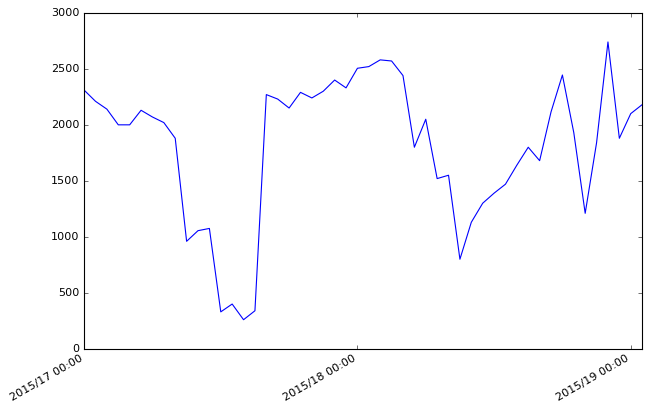

In [32]:
fig = plt.figure(figsize=(9, 6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())    
plt.plot(jan_ceilo_dt_hourly[174:224], jan_ceilo_raw_hourly[174:224])
#plt.plot(dates, cca_jan_24['PBLH'][1,1, :, 0])
#plt.xaxis_date()
fig.autofmt_xdate()

In [10]:
dic_24h = sio.loadmat("/Users/claudiopierard/WRF/Datos/WRF/dic/12_24hrs_D2.mat")

In [12]:
dic = blt.import_var_mat(dic_24h, "Atmos")

In [13]:
dic.keys()

dict_keys(['PBLH_std', 'U', 'HGT', 'T', 'XLONG', 'PHB', 'PBLH_avg', 'PH', 'XLAT', 'V', 'PBLH', 'T2', 'Z'])

In [16]:
dic['XLAT'][:,:, 0, 0]

array([[ 19.38293266,  19.38293266,  19.38293266],
       [ 19.33769035,  19.33769035,  19.33769035],
       [ 19.29242516,  19.29242516,  19.29242516]])

In [17]:
dic['XLONG'][:,:, 0,0]

array([[-99.14298248, -99.19094086, -99.2388916 ],
       [-99.14298248, -99.19094086, -99.2388916 ],
       [-99.14298248, -99.19094086, -99.2388916 ]])